In [117]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import warnings
warnings.filterwarnings('ignore')

In [118]:
data=pd.read_csv('/content/Eps7-BreadBasket_DMS.csv')

In [119]:
data.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [120]:
data.shape

(21293, 4)

In [121]:
data.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [123]:
data.isnull().sum()

,0
Date,0
Time,0
Transaction,0
Item,0


In [124]:
data.loc[data['Item']=='NONE',:].count()

,0
Date,786
Time,786
Transaction,786
Item,786


In [125]:
data=data.drop(data.loc[data['Item']=='NONE'].index)

In [126]:
data.loc[data['Item']=='NONE',:].count()

,0
Date,0
Time,0
Transaction,0
Item,0


In [127]:
data['Item'].value_counts().sort_values(ascending=False).head(10)

,count
Item,
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Sandwich,771
Medialuna,616
Hot chocolate,590
Cookies,540


Text(0.5, 1.0, 'Best Sellers')

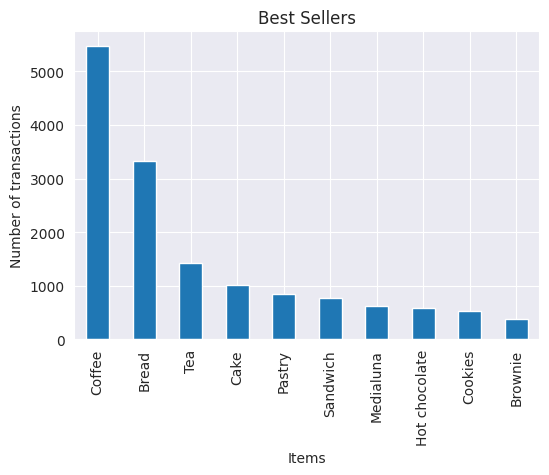

In [128]:
fig, ax=plt.subplots(figsize=(6,4))
data['Item'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.ylabel('Number of transactions')
plt.xlabel('Items')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Best Sellers')

In [129]:
data.loc[(data['Time']<'12:00:00'), 'Daytime']='Morning'
data.loc[(data['Time']>='12:00:00')&(data['Time']<'17:00:00'), 'Daytime']='Afternoon'
data.loc[(data['Time']>='17:00:00')&(data['Time']<'21:00:00'), 'Daytime']='Evening'
data.loc[(data['Time']>='21:00:00')&(data['Time']<'23:50:00'), 'Daytime']='Night'

Text(0.5, 1.0, 'Business during the day')

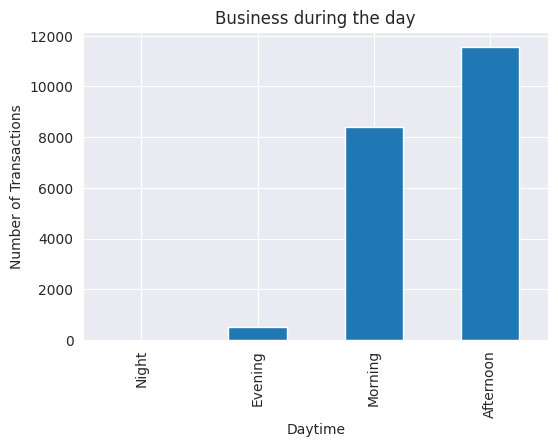

In [130]:
fig, ax=plt.subplots(figsize=(6,4))
sns.set_style('darkgrid')
data.groupby('Daytime')['Item'].count().sort_values().plot(kind='bar')
plt.ylabel('Number of Transactions')
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.title('Business during the day')

In [131]:
data.groupby('Daytime')['Item'].count().sort_values(ascending=False)

,Item
Daytime,
Afternoon,11569
Morning,8404
Evening,520
Night,14


In [132]:
data['Date_Time']=pd.to_datetime(data['Date']+' '+data['Time'])
data['Day']=data['Date_Time'].dt.day_name()
data['Month']=data['Date_Time'].dt.month
data['Month_name']=data['Date_Time'].dt.month_name()
data['Year']=data['Date_Time'].dt.year
data['Year_Month']=data['Year'].apply(str)+' '+data['Month_name'].apply(str)
data.drop(['Date', 'Time'], axis=1, inplace=True)

data.index=data['Date_Time']
data.index.name='Date'
data.drop(['Date_Time'], axis=1, inplace=True)
data.head()

,Transaction,Item,Daytime,Day,Month,Month_name,Year,Year_Month
Date,,,,,,,,
2016-10-30 09:58:11,1,Bread,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:05:34,2,Scandinavian,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Hot chocolate,Morning,Sunday,10,October,2016,2016 October
2016-10-30 10:07:57,3,Jam,Morning,Sunday,10,October,2016,2016 October


Text(0.5, 1.0, 'Business during the past months')

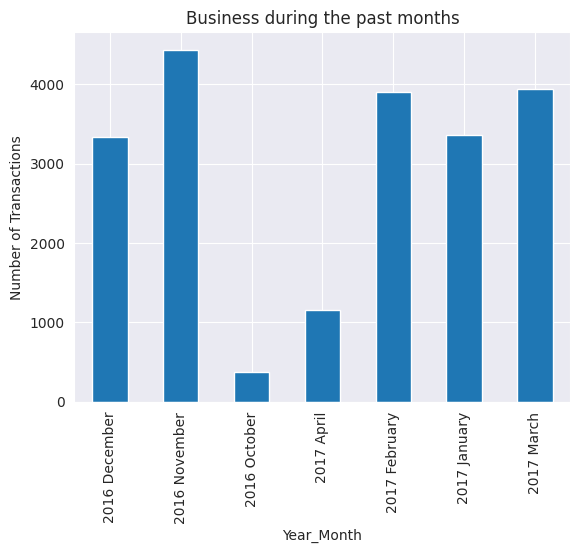

In [133]:
data.groupby('Year_Month')['Item'].count().plot(kind='bar')
plt.ylabel('Number of Transactions')
plt.title('Business during the past months')

In [134]:
data2=data.pivot_table(index='Month_name', columns='Item', aggfunc={'Item':'count'}).fillna(0)
data2['Max']=data2.idxmax(axis=1)
data2

Item                                                     \
Item       Adjustment Afternoon with the baker Alfajores Argentina Night   
Month_name                                                                 
April             0.0                      2.0      24.0             5.0   
December          0.0                      0.0      45.0             0.0   
February          0.0                     13.0     112.0             0.0   
January           0.0                     15.0      39.0             0.0   
March             0.0                     14.0       8.0             2.0   
November          1.0                      0.0     141.0             0.0   
October           0.0                      0.0       0.0             0.0   

                                                                 ...  \
Item       Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ...   
Month_name                                                       ...   
April           1.0   0.0     11.0      0.0          0.0    0.0  ...   
December        6.0   0.0      0.0      8.0          3.0    0.0  ...   
February        5.0   0.0     60.0      1.0          2.0    0.0  ...   
January         5.0   0.0     20.0     10.0          0.0    0.0  ...   
March           3.0   0.0     61.0     19.0          0.0    0.0  ...   
November       18.0   1.0      0.0     10.0          0.0    4.0  ...   
October         0.0   0.0      0.0      0.0          0.0    2.0  ...   

                                                                    \
Item       The Nomad Tiffin Toast Truffles Tshirt Valentine's card   
Month_name                                                           
April            8.0   20.0  22.0     22.0    0.0              0.0   
December        10.0    0.0  65.0     27.0    0.0              0.0   
February        12.0   26.0  72.0     37.0   21.0             12.0   
January         15.0   36.0  79.0     30.0    0.0              1.0   
March           10.0   57.0  80.0     48.0    0.0              0.0   
November         3.0    7.0   0.0     29.0    0.0              0.0   
October          0.0    0.0   0.0      0.0    0.0              0.0   

                                                                   Max  
Item       Vegan Feast Vegan mincepie Victorian Sponge                  
Month_name                                                              
April              7.0            0.0              0.0  (Item, Coffee)  
December           0.0           33.0              0.0  (Item, Coffee)  
February           3.0            5.0              0.0  (Item, Coffee)  
January            0.0           13.0              0.0  (Item, Coffee)  
March              6.0            3.0              0.0  (Item, Coffee)  
November           0.0            0.0              4.0  (Item, Coffee)  
October            0.0            0.0              3.0  (Item, Coffee)  

[7 rows x 95 columns]

In [135]:
data3=data.pivot_table(index='Daytime', columns='Item', aggfunc={'Item':'count'}).fillna(0)
data3['Max']=data3.idxmax(axis=1)
data3

Item                                                     \
Item      Adjustment Afternoon with the baker Alfajores Argentina Night   
Daytime                                                                   
Afternoon        0.0                     19.0     245.0             3.0   
Evening          1.0                     15.0      17.0             0.0   
Morning          0.0                     10.0     107.0             4.0   
Night            0.0                      0.0       0.0             0.0   

                                                                ...            \
Item      Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Daytime                                                         ...             
Afternoon     31.0   1.0     67.0     30.0          4.0    0.0  ...      31.0   
Evening        2.0   0.0      1.0      0.0          1.0    0.0  ...       1.0   
Morning        5.0   0.0     84.0     18.0          0.0    6.0  ...      26.0   
Night          0.0   0.0      0.0      0.0          0.0    0.0  ...       0.0   

                                                                      \
Item      Tiffin  Toast Truffles Tshirt Valentine's card Vegan Feast   
Daytime                                                                
Afternoon   93.0  114.0    152.0    0.0              4.0         4.0   
Evening      4.0    0.0      7.0   21.0              4.0         3.0   
Morning     49.0  204.0     34.0    0.0              3.0         2.0   
Night        0.0    0.0      0.0    0.0              2.0         7.0   

                                                           Max  
Item      Vegan mincepie Victorian Sponge                       
Daytime                                                         
Afternoon           30.0              5.0       (Item, Coffee)  
Evening              2.0              0.0       (Item, Coffee)  
Morning             22.0              2.0       (Item, Coffee)  
Night                0.0              0.0  (Item, Vegan Feast)  

[4 rows x 95 columns]

In [136]:
data4=data.pivot_table(index='Day', columns='Item', aggfunc={'Item':'count'}).fillna(0)
data4['Max']=data4.idxmax(axis=1)
data4

Item                                                     \
Item      Adjustment Afternoon with the baker Alfajores Argentina Night   
Day                                                                       
Friday           0.0                      7.0      59.0             0.0   
Monday           0.0                      5.0      32.0             0.0   
Saturday         0.0                     12.0      67.0             5.0   
Sunday           0.0                     14.0      70.0             1.0   
Thursday         0.0                      2.0      57.0             1.0   
Tuesday          0.0                      2.0      43.0             0.0   
Wednesday        1.0                      2.0      41.0             0.0   

                                                                ...            \
Item      Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ... The Nomad   
Day                                                             ...             
Friday         4.0   0.0     21.0      3.0          0.0    0.0  ...       6.0   
Monday         2.0   0.0     10.0      8.0          0.0    0.0  ...       5.0   
Saturday       5.0   0.0     33.0      8.0          0.0    3.0  ...      24.0   
Sunday         7.0   1.0     21.0     11.0          0.0    3.0  ...      15.0   
Thursday       8.0   0.0     21.0      3.0          4.0    0.0  ...       3.0   
Tuesday        6.0   0.0     23.0     13.0          0.0    0.0  ...       2.0   
Wednesday      6.0   0.0     23.0      2.0          1.0    0.0  ...       3.0   

                                                                     \
Item      Tiffin Toast Truffles Tshirt Valentine's card Vegan Feast   
Day                                                                   
Friday      37.0  63.0     33.0    0.0              1.0         1.0   
Monday       3.0  38.0     29.0    0.0              0.0         0.0   
Saturday    35.0  53.0     46.0   21.0              7.0        10.0   
Sunday      28.0  36.0     23.0    0.0              0.0         2.0   
Thursday    25.0  53.0     23.0    0.0              3.0         0.0   
Tuesday      5.0  40.0     19.0    0.0              2.0         2.0   
Wednesday   13.0  35.0     20.0    0.0              0.0         1.0   

                                                      Max  
Item      Vegan mincepie Victorian Sponge                  
Day                                                        
Friday               9.0              0.0  (Item, Coffee)  
Monday               5.0              0.0  (Item, Coffee)  
Saturday            11.0              1.0  (Item, Coffee)  
Sunday               9.0              4.0  (Item, Coffee)  
Thursday             7.0              0.0  (Item, Coffee)  
Tuesday              8.0              1.0  (Item, Coffee)  
Wednesday            5.0              1.0  (Item, Coffee)  

[7 rows x 95 columns]

Text(0.5, 1.0, 'Business during the past months')

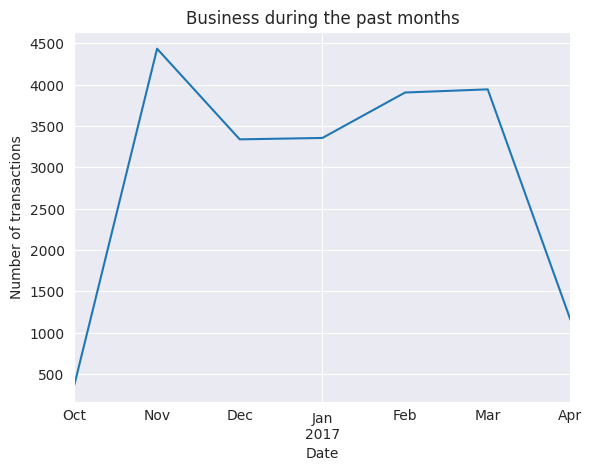

In [137]:
data['Item'].resample('M').count().plot()
plt.ylabel('Number of transactions')
plt.title('Business during the past months')

In [138]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [139]:
lst = []
for item in data['Transaction'].unique():
  lst2=list(set(data[data['Transaction']==item]['Item']))
  if len(lst2)>0:
    lst.append(lst2)
print(lst[0:3])
print(len(lst))

[['Bread'], ['Scandinavian'], ['Cookies', 'Jam', 'Hot chocolate']]
9465


In [140]:
te=TransactionEncoder()
te_data=te.fit(lst).transform(lst)
data_x=pd.DataFrame(te_data, columns=te.columns_)
print(data_x.head())

frequent_items=apriori(data_x, use_colnames=True, min_support=0.03)
print(frequent_items.head())

rules = association_rules(frequent_items, metric='lift', min_threshold=1)
rules.antecedents=rules.antecedents.apply(lambda x: next(iter(x)))
rules.consequents=rules.consequents.apply(lambda x: next(iter(x)))
rules

   Adjustment  Afternoon with the baker  Alfajores  Argentina Night  Art Tray  \
0       False                     False      False            False     False   
1       False                     False      False            False     False   
2       False                     False      False            False     False   
3       False                     False      False            False     False   
4       False                     False      False            False     False   

   Bacon  Baguette  Bakewell  Bare Popcorn  Basket  ...  The BART  The Nomad  \
0  False     False     False         False   False  ...     False      False   
1  False     False     False         False   False  ...     False      False   
2  False     False     False         False   False  ...     False      False   
3  False     False     False         False   False  ...     False      False   
4  False     False     False         False   False  ...     False      False   

   Tiffin  Toast  Truffles  Tshi

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
1,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
2,Coffee,Medialuna,0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667,0.305936
3,Medialuna,Coffee,0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
4,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.256084
5,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
6,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.194321
7,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.109205


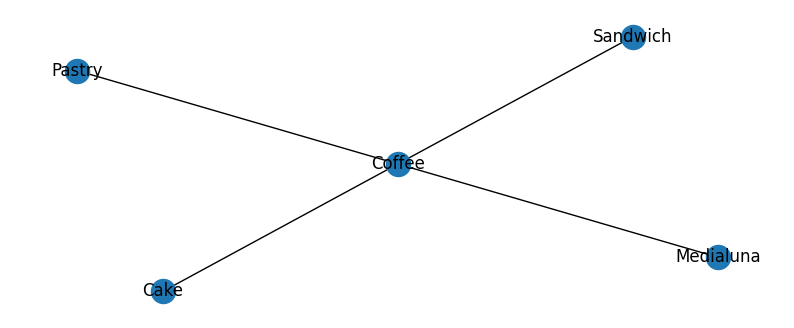

In [141]:
fig, ax=plt.subplots(figsize=(10,4))
GA=nx.from_pandas_edgelist(rules, source='antecedents', target='consequents')
nx.draw(GA, with_labels=True)
plt.show()

**Menampilkan Item plaing tidak populer**

Least Popular Items:
 Item
Polenta            1
Chicken sand       1
The BART           1
Adjustment         1
Raw bars           1
Gift voucher       1
Olum & polenta     1
Bacon              1
Siblings           2
Chimichurri Oil    2
Name: count, dtype: int64


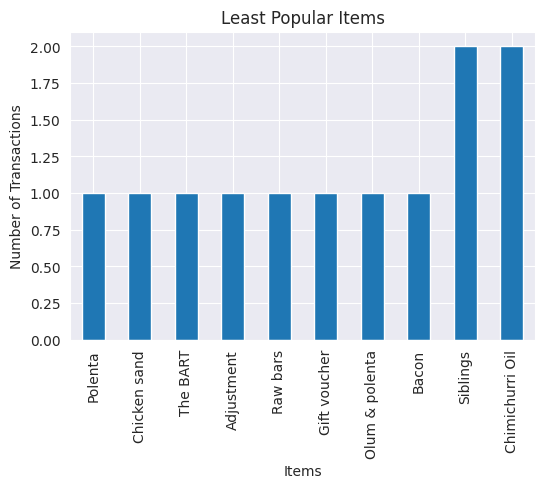

In [142]:
least_popular_items = data['Item'].value_counts().sort_values(ascending=True).head(10)
print("Least Popular Items:\n", least_popular_items)

fig, ax = plt.subplots(figsize=(6, 4))
least_popular_items.plot(kind='bar')
plt.ylabel('Number of Transactions')
plt.xlabel('Items')
plt.title('Least Popular Items')
plt.show()


**Menampilkan Item Populer Berdasarkan Waktu Operasi Toko**

Most Popular Items by Daytime:
 Daytime
Afternoon         Coffee
Evening           Coffee
Morning           Coffee
Night        Vegan Feast
Name: Most_Popular, dtype: object


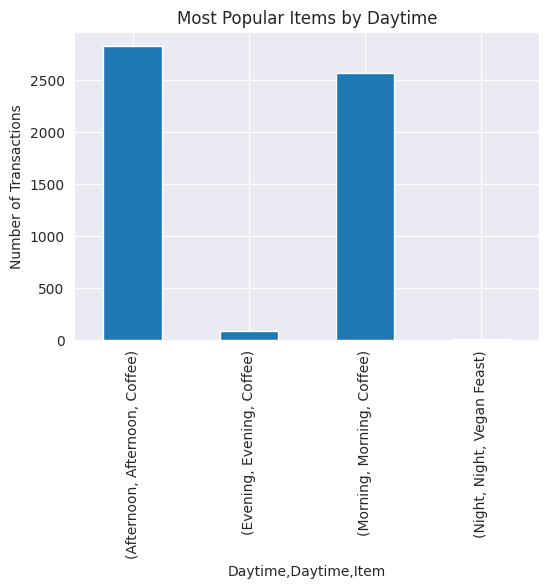

In [146]:
popular_items_by_time = data.pivot_table(index='Daytime', columns='Item', aggfunc='size', fill_value=0)
popular_items_by_time['Most_Popular'] = popular_items_by_time.idxmax(axis=1)
print("Most Popular Items by Daytime:\n", popular_items_by_time['Most_Popular'])

fig, ax = plt.subplots(figsize=(6, 4))
sns.set_style('darkgrid')
data.groupby('Daytime')['Item'].value_counts().groupby(level=0).nlargest(1).plot(kind='bar')
plt.ylabel('Number of Transactions')
plt.title('Most Popular Items by Daytime')
plt.show()
